# Lab 5. Fuzzy Systems
# Task 5.3 Washing Machine Fuzzy Controller
## Problem Descriptions
This problem aims to build a fuzzy controller to decide the washing time given degree of dirtiness of clothes and size of load of clothes. Firstly, the problem is formulated by specifying the linguitic variables, their corresponding membership functions, and the rules.

1. Linguistic variable:
 * Degree of dirtiness: SD(small), MD(medium), LD(large)
 * Size of load of clothes: SL(small), ML(medium), LL(large)
 * Washing time: VS(very short), S(short), M(medium), L(long), VL(very
   long)
2. Corresponding membership functions:
![picture](https://github.com/mengheng02/image-file/blob/main/washing%20machine%20membership%20function.png?raw=true)

  (i) Degree of Dirtiness & Size of load of clothes (0%-100%)
      * SD/SL: Start with full membership at 0%, decrease linearly to 0
        membership at the median value (50%), and remain at 0 membership until the maximum value (100%).
      * MD/ML: Start with 0 membership at 0%, increase linearly to full
        membership at the median value (50%), decrease linearly back to 0 membership at the maximum value (100%).
      * LD/LL: Start with 0 membership from 0% until 50%, and increase linearly to full membership at the maximum value (100%).

  (ii) Washing time (0 - 60 minutes)
     * VS: Start with full membership at 0 mins, decreasing linearly to 0 membership at 15 mins, and remain at 0 membership afterwards.
     * S: Start with 0 membership at 0 mins, increase linearly to full membership at 15 mins, then decrease linearly back to 0 membership at 30 mins, and remain 0 membership afterwards.
     * M: Start with 0 membership from 0 mins to 15 mins, increase linearly to full membership at 30 mins, then decrease linearly back to 0 membership at 45 mins, and remain 0 membership afterwards.
     * L: Start with 0 membership from 0 mins to 30 mins, increase linearly to full membership at 45 mins, then decrease linearly back to 0 membership at 60 mins.
     * VL: Start with 0 membership from 0 mins to 45 mins, increase linearly to full membership at 60 mins.

3. Rules
 * Rule 1: IF dirtiness is SD AND load is SL, THEN washing time is VS.
 * Rule 2: IF dirtiness is SD AND load is ML, THEN washing time is M.
 * Rule 3: IF dirtiness is SD AND load is LL, THEN washing time is L.
 * Rule 4: IF dirtiness is MD AND load is SL, THEN washing time is S.
 * Rule 5: IF dirtiness is MD AND load is ML, THEN washing time is M.
 * Rule 6: IF dirtiness is MD AND load is LL, THEN washing time is L.
 * Rule 7: IF dirtiness is LD AND load is SL, THEN washing time is M.
 * Rule 8: IF dirtiness is lD AND load is ML, THEN washing time is L.
 * Rule 9: IF dirtiness is LD AND load is LL, THEN washing time is VL.

## Implementation and Results

In [2]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=77bfeb2689c280db13d72a2fabd165ae283b46991a2786edf4b1949a83da0956
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [3]:
# Linguistic variables for antecedents/consequent
dirtiness = ctrl.Antecedent(np.arange(0, 101, 1), 'dirtiness')
load = ctrl.Antecedent(np.arange(0, 101, 1), 'load')
time = ctrl.Consequent(np.arange(0, 61, 1), 'time')

# membership functions for each linguistic values
dirtiness.automf(3, names=['SD', 'MD', 'LD'])
load.automf(3, names=['SL', 'ML', 'LL'])
time.automf(5, names=['VS', 'S', 'M', 'L', 'VL'])

#dirtiness.view()
#load.view()
#time.view()

In [4]:
# Define the rules
rule1 = ctrl.Rule(dirtiness['SD'] & load['SL'], time['VS'])
rule2 = ctrl.Rule(dirtiness['SD'] & load['ML'], time['M'])
rule3 = ctrl.Rule(dirtiness['SD'] & load['LL'], time['L'])
rule4 = ctrl.Rule(dirtiness['MD'] & load['SL'], time['S'])
rule5 = ctrl.Rule(dirtiness['MD'] & load['ML'], time['M'])
rule6 = ctrl.Rule(dirtiness['MD'] & load['LL'], time['L'])
rule7 = ctrl.Rule(dirtiness['LD'] & load['SL'], time['M'])
rule8 = ctrl.Rule(dirtiness['LD'] & load['ML'], time['L'])
rule9 = ctrl.Rule(dirtiness['LD'] & load['LL'], time['VL'])

# Create the control system and its simulation
ctrl_sys = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
ctrl_sim = ctrl.ControlSystemSimulation(ctrl_sys)

Washing time: 36.650793650793666


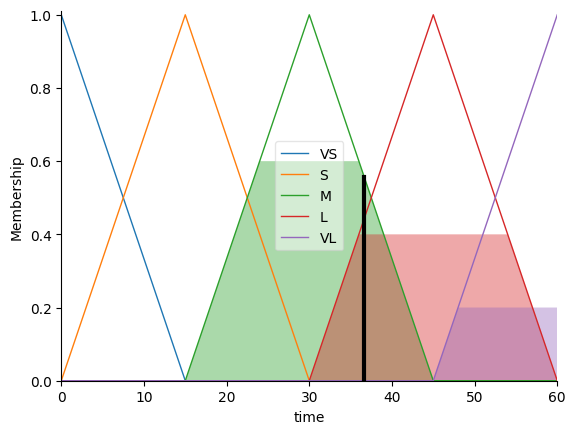

In [5]:
# Pass inputs to the ControlSystem
ctrl_sim.inputs({'dirtiness': 60, 'load': 70})

# Crunch the numbers
ctrl_sim.compute()
print("Washing time:", ctrl_sim.output['time'])
time.view(sim=ctrl_sim)




## Discussions
Given the degree of dirtiness of 60% and the size of the load of 70%, the fuzzy system suggests 36.65 minutes of washing time. Such washing time is lied between 'M' and 'L', but it has higher degree of membership in 'M' category. So the washing time is considered as medium.
